## Análise estatística
### Regressão Linear Multivariada

Problema 1</p>
Neste exercício vamos fazer uma análise de regressão multivariada com a mesma base de dados autos.csv para tentar prever o preço de carro a partir das seguintes variáveis: potência (horsepower), comprimento (length), tamanho do motor (engine.size), consumo na cidade (city.mpg).
Utilizando então a base disponibilizada, você deve:

In [1]:
# Declarando bibliotecas
library(readr)
library(GGally)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
# Importando dados
carros = read_csv2("autos.csv")
head(carros)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 193 Columns: 24
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ";"
chr  (8): make, fuel.type, aspiration, body.style, drive.wheels, engine.loca...
dbl (16): num.doors, wheel.base, length, width, height, curb.weight, num.cyl...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
# checando valores nulos
sapply(carros, function(x) sum(is.na(x)))

make         fuel.type        aspiration         num.doors 
                0                 0                 0                 0 
       body.style      drive.wheels   engine.location        wheel.base 
                0                 0                 0                 0 
           length             width            height       curb.weight 
                0                 0                 0                 0 
      engine.type     num.cylinders       engine.size       fuel.system 
                0                 0                 0                 0 
             bore            stroke compression.ratio        horsepower 
                0                 0                 0                 0 
         peak.rpm          city.mpg       highway.mpg             price 
                0                 0                 0                 0

In [4]:
# Pegando um subset dos dados para analisar, incluíndo as variáveis horsepower, length, engine.size e city.mpg
dados <- subset(carros, select=c(horsepower, length, engine.size, city.mpg))

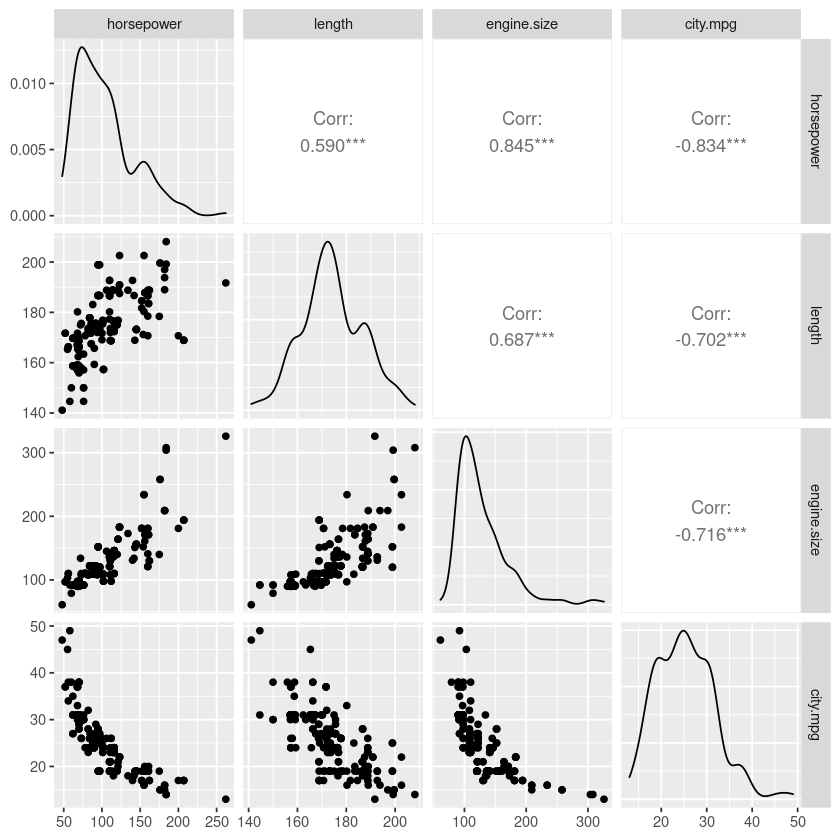

In [5]:
# Montando o gráfico
ggpairs(dados, columns = 1:ncol(dados))

In [6]:
# As variávis horsepower, lenght e city.mpg aparentam ser bimodais, enquanto a variável engine.size
# possui uma distribuição mais próxima da normal, mas com uma calda à direita
# Também conseguimos ver que as dispersões tem um comportamento exponencial

a)    Ajustar um modelo de regressão linear sendo price a variável alvo (resposta), como função das demais variáveis citadas acima: horsepower, length, engine.size, city.mpg.

In [7]:
# Criando a regressão considerando as variáveis preditoras horsepower, length, engine.size, city.mpg

regressao = lm(price ~ horsepower + length + engine.size + city.mpg -1, data=carros)
regressao


Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg - 
    1, data = carros)

Coefficients:
 horsepower       length  engine.size     city.mpg  
     17.469       -2.796      134.546     -206.826  


b)    Realizar a análise do modelo ajustado, avaliando o valor do R-quadrado, a significância estatística de cada parâmetro ajustado e a qualidade total do ajuste pela estatística F.

In [8]:
summary(regressao)


Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg - 
    1, data = carros)

Residuals:
    Min      1Q  Median      3Q     Max 
-9485.0 -1916.4   -68.6  1703.5 13866.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
horsepower    17.469     14.637   1.193    0.234    
length        -2.796     14.072  -0.199    0.843    
engine.size  134.546     12.467  10.792  < 2e-16 ***
city.mpg    -206.826     50.942  -4.060 7.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3636 on 189 degrees of freedom
Multiple R-squared:  0.9464,	Adjusted R-squared:  0.9453 
F-statistic: 834.5 on 4 and 189 DF,  p-value: < 2.2e-16


c)    Realizar a verificação de aderência do modelo às premissas estatísticas do método dos mínimos quadrados através dos gráficos diagnósticos, comentando o gráfico dos resíduos x valores ajustados e o gráfico da curva Normal-QQ.

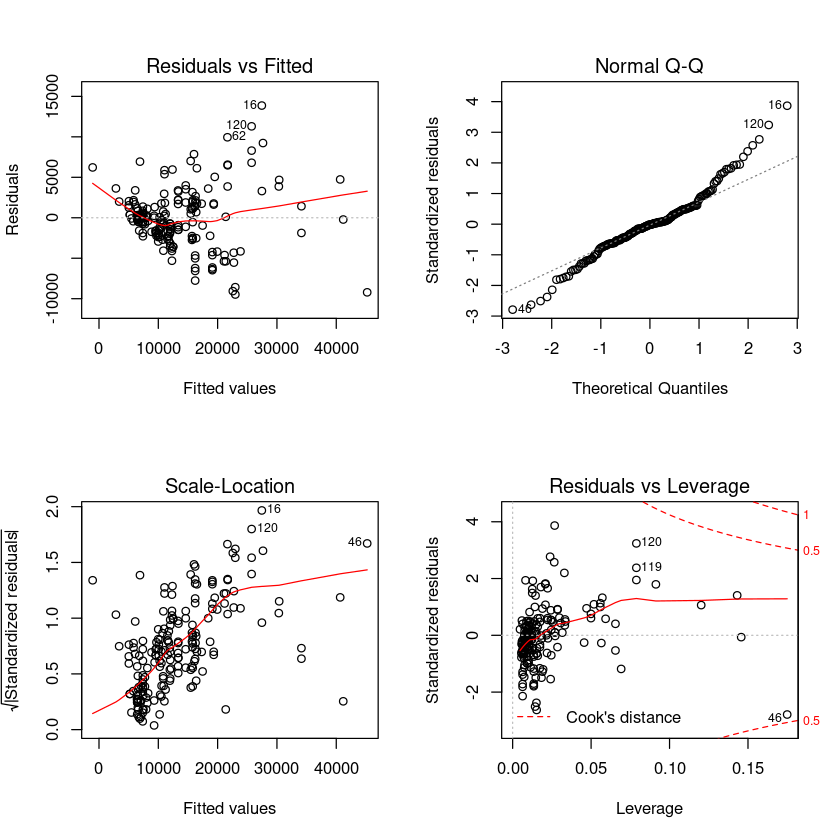

In [9]:
par(mfrow=c(2,2))
plot(regressao)

In [10]:
# Observando o gráfico de resíduos vemos que os valores distribuídos não possuem uma distribuição
# totalmente aleatória, com uma concentração dos resíduos em valores mais próximos de 0 por volta do 
# Fitted values 15000, e os resíduos aumentam expandem com o aumento do fitted values.
# O padrão de distribuição dos resíduos se assemelha mais a uma função polinomial do que a reta
# ideal do modelo

# No gráfico do qqnorm (normal) temos que a os pontos são aderentes a uma distribuição
# apenas entre os valores -1 e 1 dos Theoretical Quantilies, escapando da curva normal fora dessa faixa.

# Esses dois fatores em conjunto indicam que são necessários ajustes para aumentar a confiabilidade
# do modelo.

d)    Fazer uma análise dos resultados do ajuste, discorrendo sobre o impacto de cada preditora, significativa do ponto de vista estatístico, no preço do carro.

In [11]:
# As varíáveis horsepower e lenght possuem a probabilidade do teste t em um valor alto frente 
# significância, indicando que essas variáveis não colaboram com a explicação do modelo.
# As demais variáveis estão aderentes ao modelo.


Call:
lm(formula = price ~ length + engine.size + city.mpg - 1, data = carros)

Coefficients:
     length  engine.size     city.mpg  
      4.828      143.842     -235.230  



Call:
lm(formula = price ~ length + engine.size + city.mpg - 1, data = carros)

Residuals:
    Min      1Q  Median      3Q     Max 
-9414.8 -1965.7   -36.1  1674.0 14080.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
length         4.828     12.553   0.385    0.701    
engine.size  143.842      9.745  14.761  < 2e-16 ***
city.mpg    -235.230     45.091  -5.217 4.74e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3640 on 190 degrees of freedom
Multiple R-squared:  0.946,	Adjusted R-squared:  0.9452 
F-statistic:  1110 on 3 and 190 DF,  p-value: < 2.2e-16


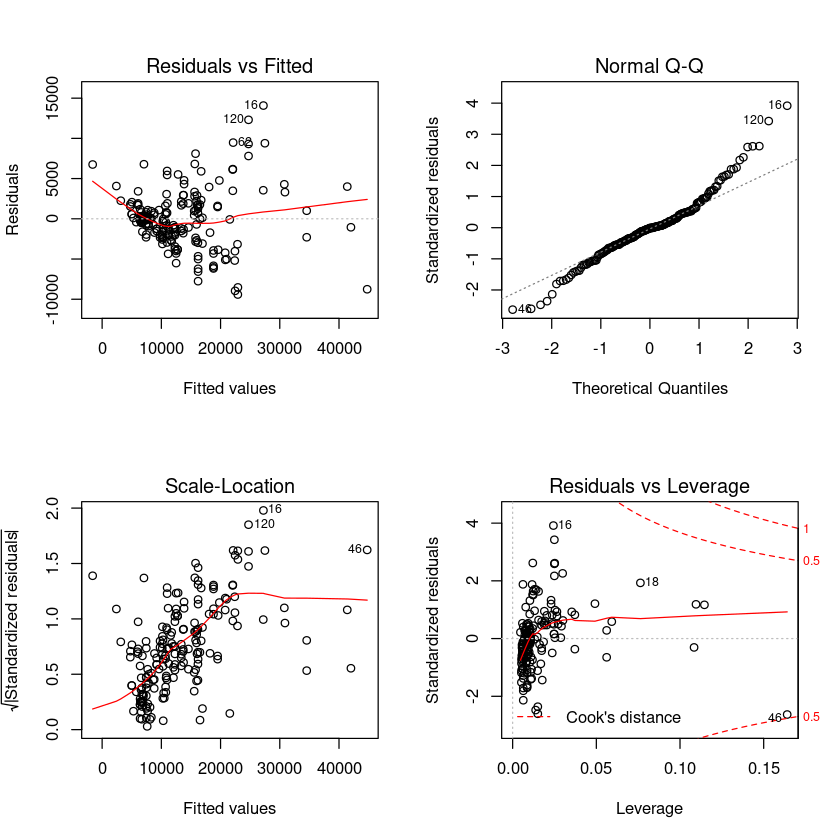

In [12]:
# Atualizando a regressão, com a retirada da variável horsepower
regressao2 = update(regressao, .~. -horsepower)
regressao2
summary(regressao2)

par(mfrow=c(2,2))
plot(regressao2)

In [13]:
# Com a retirada da variável horsepower conseguimos manter um valor de R² muito proximo da análise
# anterior, juntamente com a aproximação da mediana para o valor 0. Porém não tivemos uma melhora
# significativa na distribuição dos resíduos.


Call:
lm(formula = price ~ engine.size + city.mpg - 1, data = carros)

Coefficients:
engine.size     city.mpg  
      147.3       -219.7  



Call:
lm(formula = price ~ engine.size + city.mpg - 1, data = carros)

Residuals:
    Min      1Q  Median      3Q     Max 
-9421.7 -1974.6   -65.7  1655.3 14050.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
engine.size   147.27       3.92   37.57   <2e-16 ***
city.mpg     -219.74      20.22  -10.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3632 on 191 degrees of freedom
Multiple R-squared:  0.946,	Adjusted R-squared:  0.9454 
F-statistic:  1672 on 2 and 191 DF,  p-value: < 2.2e-16


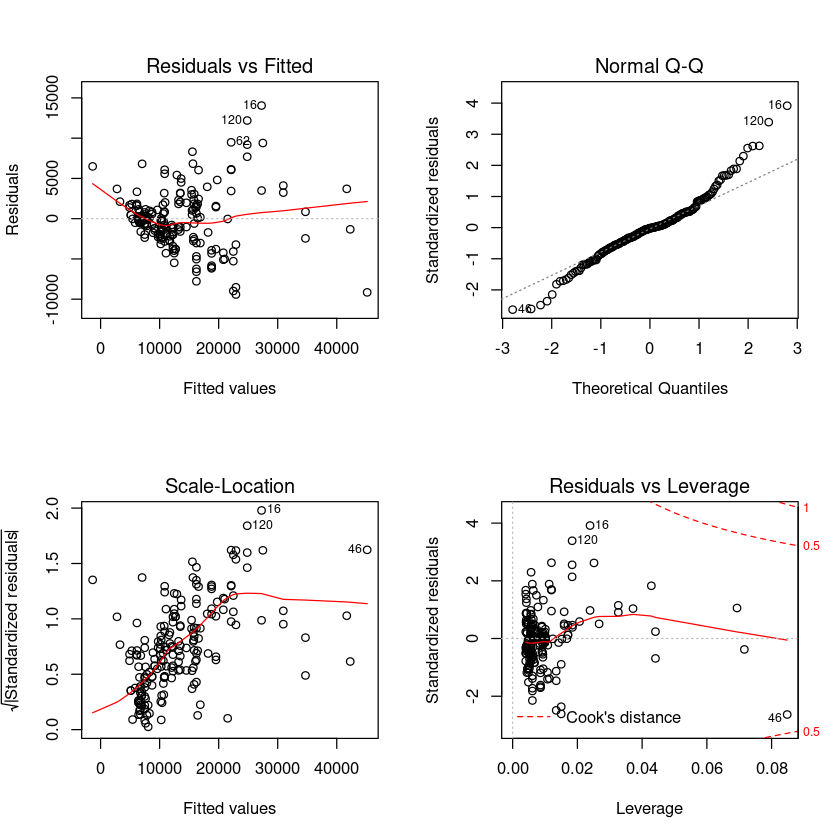

In [14]:
# Atualizando a regressão, com a retirada da variável lenght
regressao3 = update(regressao2, .~. -length)
regressao3
summary(regressao3)

par(mfrow=c(2,2))
plot(regressao3)

In [15]:
# Com a retirada da variável length conseguimos manter um valor de R² muito proximo da análise
# anterior e não tivemos uma melhora significativa na distribuição dos resíduos.